In [1]:
import LinAlg as LA
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import Debug
import random

In [2]:
# Generate 10 random points
random_points = Debug.generate_random_points(10)

# Print the generated points
for point in random_points:
    print(point)


theta = np.pi / 4  # 45 degrees rotation around Z-axis
phi = np.pi / 6    # 30 degrees rotation around Y-axis
translation = LA.Vector(random.uniform(0,2000), random.uniform(0,2000), random.uniform(0,2000))  # Translation vector

transformation_matrix = Debug.create_transformation_matrix(theta, phi, translation)
print(transformation_matrix)

transformed_points = LA.transform_points(transformation_matrix, random_points)


Vector(44.48, 52.36, 186.96)
Vector(65.43, 23.47, 96.33)
Vector(49.92, 94.65, 14.23)
Vector(31.18, 34.58, 38.97)
Vector(154.45, 126.82, 53.20)
Vector(137.59, 133.53, 170.94)
Vector(128.47, 56.37, 157.26)
Vector(143.80, 6.16, 189.55)
Vector(126.80, 92.69, 163.15)
Vector(20.34, 0.56, 41.00)
[[   0.6124   -0.6124    0.5     597.9009]
 [   0.7071    0.7071    0.     1330.6554]
 [  -0.3536    0.3536    0.866   300.9949]
 [   0.        0.        0.        1.    ]]


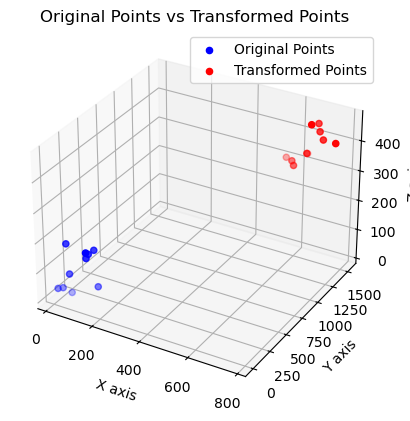

In [3]:
transformed_points = LA.transform_points(transformation_matrix, random_points)
Debug.plot_original_vs_transformed(random_points, transformed_points)

Find transformation from random_points to transformed_points

In [4]:
# Convert transformed_points and random_points to numpy arrays
transformed_points_np = Debug.vectors_to_numpy(transformed_points)
random_points_np = Debug.vectors_to_numpy(random_points)

# Call the function with correct inputs
R, t = LA.point_cloud_registration_least_squares(transformed_points_np, random_points_np)

print("Rotation matrix:", R)
print("Translation vector:", t, "\n")

print("Ground truth: \n", transformation_matrix)

Rotation matrix: [[ 6.12372433e-01 -6.12372427e-01  5.00000014e-01]
 [ 7.07106741e-01  7.07106821e-01  8.90157294e-08]
 [-3.53553475e-01  3.53553326e-01  8.66025396e-01]]
Translation vector: [ 597.9008862  1330.65536351  300.99492533] 

Ground truth: 
 [[   0.6124   -0.6124    0.5     597.9009]
 [   0.7071    0.7071    0.     1330.6554]
 [  -0.3536    0.3536    0.866   300.9949]
 [   0.        0.        0.        1.    ]]


Proposed point:  Vector(686.55, 1399.13, 465.69)
Proposed point:  Vector(671.76, 1393.52, 369.59)
Proposed point:  Vector(577.62, 1432.88, 329.13)
Proposed point:  Vector(615.31, 1377.16, 335.94)
Proposed point:  Vector(641.42, 1529.54, 337.30)
Proposed point:  Vector(685.86, 1522.36, 447.60)
Proposed point:  Vector(720.68, 1461.35, 411.70)
Proposed point:  Vector(776.96, 1436.70, 416.48)
Proposed point:  Vector(700.36, 1485.86, 430.23)
Proposed point:  Vector(630.51, 1345.44, 329.51)
Truth point:  Vector(686.55, 1399.13, 465.69)
Truth point:  Vector(671.76, 1393.52, 369.59)
Truth point:  Vector(577.62, 1432.88, 329.13)
Truth point:  Vector(615.31, 1377.16, 335.94)
Truth point:  Vector(641.42, 1529.54, 337.30)
Truth point:  Vector(685.86, 1522.36, 447.60)
Truth point:  Vector(720.68, 1461.35, 411.70)
Truth point:  Vector(776.96, 1436.70, 416.48)
Truth point:  Vector(700.36, 1485.86, 430.23)
Truth point:  Vector(630.51, 1345.44, 329.51)


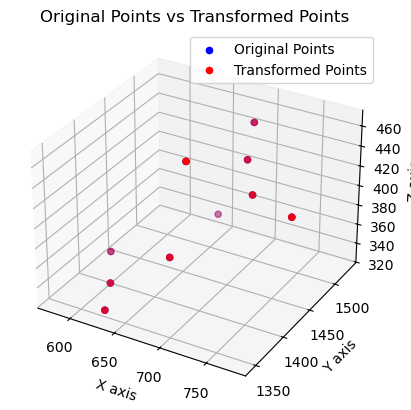

In [5]:
Proposed_transformation_matrix = LA.Frame(R, t)
Proposed_transformed_points = LA.transform_points(Proposed_transformation_matrix, random_points)

for point in Proposed_transformed_points:
    print("Proposed point: " ,point)

for point in transformed_points:
    print("Truth point: ", point)


Debug.plot_original_vs_transformed(transformed_points, Proposed_transformed_points)  

In [6]:
vectors = [
    [435.23, 494.25, -1278.90],
    [446.56, 432.42, -1379.92],
    [458.84, 405.61, -1215.28],
    [465.71, 388.82, -1371.15],
    [433.86, 450.57, -1377.35],
    [445.29, 470.54, -1238.88],
    [440.33, 481.04, -1249.67],
    [497.80, 394.06, -1318.32],
    [355.78, 477.43, -1344.66],
    [361.63, 365.44, -1380.96],
    [440.95, 484.29, -1336.65],
    [300.84, 400.14, -1289.10]
]

center, radius, residual_sum = LA.fit_sphere(vectors)
print("Center: ", center)

AttributeError: module 'LinAlg' has no attribute 'fit_sphere'

In [9]:
import numpy as np

# Define matrix A
A = np.array([
    [1.00000000e+00, -2.64907317e-23, -2.49003503e-23, -1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [2.64907317e-23, 1.00000000e+00, 2.02563577e-23, 0.00000000e+00, -1.00000000e+00, 0.00000000e+00],
    [2.49003503e-23, -2.02563577e-23, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00, -1.00000000e+00]
])

# Define vector b
b = np.array([[-247.5916748], [-245.36332703], [-136.3583374]])

# Solve for x
x = np.linalg.lstsq(A, b, rcond=None)[0]

print("Solution x:")
print(x)


Solution x:
[[-123.7958374 ]
 [-122.68166351]
 [ -68.1791687 ]
 [ 123.7958374 ]
 [ 122.68166351]
 [  68.1791687 ]]
